In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
%matplotlib inline

In [7]:
ap = pd.DataFrame.from_csv('MSFT.csv')
print(ap)
ap_data = ap.loc['2015-01-01':'2019-12-31']
print(ap_data)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1986-03-13    0.088542    0.101563    0.088542    0.097222    0.062549   
1986-03-14    0.097222    0.102431    0.097222    0.100694    0.064783   
1986-03-17    0.100694    0.103299    0.100694    0.102431    0.065899   
1986-03-18    0.102431    0.103299    0.098958    0.099826    0.064224   
1986-03-19    0.099826    0.100694    0.097222    0.098090    0.063107   
1986-03-20    0.098090    0.098090    0.094618    0.095486    0.061432   
1986-03-21    0.095486    0.097222    0.091146    0.092882    0.059756   
1986-03-24    0.092882    0.092882    0.089410    0.090278    0.058081   
1986-03-25    0.090278    0.092014    0.089410    0.092014    0.059198   
1986-03-26    0.092014    0.095486    0.091146    0.094618    0.060873   
1986-03-27    0.094618    0.096354    0.094618    0.096354    0.061990   
1986-03-31    0.096354    0.096354    

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [8]:
#df = pd.DataFrame(ap_data, columns=['Difference'])
ap_data['PriceDiff'] = ap_data['Close'].shift(-1) - ap_data['Close']

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
print(ap_data['PriceDiff'])

Date
2015-01-02   -0.429996
2015-01-05   -0.680000
2015-01-06    0.579998
2015-01-07    1.360000
2015-01-08   -0.400001
2015-01-09   -0.590001
2015-01-12   -0.239997
2015-01-13   -0.400002
2015-01-14   -0.479999
2015-01-15    0.760002
2015-01-16    0.149997
2015-01-20   -0.470001
2015-01-21    1.210003
2015-01-22    0.049999
2015-01-23   -0.170002
2015-01-26   -4.349998
2015-01-27   -1.470001
2015-01-28    0.819999
2015-01-29   -1.609996
2015-01-30    0.879997
2015-02-02    0.319999
2015-02-03    0.240002
2015-02-04    0.610001
2015-02-05   -0.040001
2015-02-06   -0.049999
2015-02-09    0.239997
2015-02-10   -0.219997
2015-02-11    0.709999
2015-02-12    0.779999
2015-02-13   -0.289997
                ...   
2019-11-18    0.050003
2019-11-19   -0.770004
2019-11-20   -0.139999
2019-11-21    0.110000
2019-11-22    1.640000
2019-11-25    0.800003
2019-11-26    0.290008
2019-11-27   -0.940002
2019-11-29   -1.830002
2019-12-02   -0.240005
2019-12-03    0.540008
2019-12-04    0.079987
2019-1

In [34]:
# Draw sample with replacement, size=20 from Population
a_sample_with_replacement = ap_data['PriceDiff'].sample(20, replace=True)
print(a_sample_with_replacement)

Date
2018-07-24    3.169998
2017-12-13   -0.659996
2016-12-15   -0.280003
2017-02-06   -0.209999
2015-07-24   -0.590001
2017-06-05    0.239998
2016-06-27    1.009999
2018-12-17    1.080002
2018-05-25   -0.349999
2015-04-06   -0.020000
2016-06-09   -0.139999
2016-08-29   -0.209999
2015-11-03    0.250000
2015-09-11   -0.439999
2018-09-20    0.690002
2018-06-12   -0.460000
2015-07-29    0.590000
2018-02-12    0.700005
2019-04-05    0.040001
2017-12-19   -0.310005
Name: PriceDiff, dtype: float64


In [35]:
# Draw sample without replacement, size=20 from Population
a_sample_without_replacement = ap_data['PriceDiff'].sample(20, replace=False)
print(a_sample_without_replacement)

Date
2016-09-09    0.840000
2015-02-23   -0.060002
2019-04-26   -0.119995
2019-01-29    3.439995
2019-11-12    0.239991
2016-06-10   -1.340001
2015-04-16   -0.540001
2018-03-14    0.330002
2018-10-23   -5.779998
2019-09-11    1.400009
2018-06-25    0.690003
2018-12-10    1.000000
2018-06-27    1.089996
2019-04-17    1.600006
2019-04-03   -0.610000
2019-03-18    0.080002
2015-11-25    0.240001
2015-08-14    0.320000
2019-01-31   -1.650001
2018-05-25   -0.349999
Name: PriceDiff, dtype: float64


In [36]:
# Calculate mean and variance
df_mean = ap_data['PriceDiff'].mean()
df_var = ap_data['PriceDiff'].var()
print('Population mean is ', df_mean)
print('Population variance is', df_var)

Population mean is  0.08825775576770087
Population variance is 1.4797494949820158


In [37]:
# Calculate sample mean and sample standard deviation, size =10
# You will get different mean and varince every time when you excecute the below code

a_sample = ap_data['PriceDiff'].sample(20, replace=True)
sample_mean = a_sample.mean()
sample_var = a_sample.var()
print('Sample mean is ', sample_mean)
print('Sample variance is', sample_var)

Sample mean is  0.32499914999999824
Sample variance is 2.3794003994868724


In [40]:
# Sample mean and SD keep changing, but always within a certain range
Fstsample = pd.DataFrame(np.random.normal(0.08825775576770087,  1.4797494949820158, size=20))
print('sample mean is ', Fstsample[0].mean())
print('sample SD is ', Fstsample[0].std(ddof=1))

sample mean is  0.6100031861206119
sample SD is  1.4308972774234738


In [41]:
meanlist = []
varlist = []
for t in range(10000):
    sample = pd.DataFrame(np.random.normal(0.08825775576770087,  1.4797494949820158, size=20))
    meanlist.append(sample[0].mean())
    varlist.append(sample[0].var(ddof=1))

In [42]:
print(sample)

           0
0  -0.269115
1  -2.054218
2  -3.038681
3  -0.575927
4  -0.983546
5  -2.193602
6   3.193006
7   2.475255
8  -2.097257
9  -1.261254
10 -0.213386
11  0.056508
12 -0.351835
13 -2.428218
14 -0.317249
15 -1.221760
16  0.404647
17  0.944321
18  0.672828
19 -0.457446


In [43]:
collection = pd.DataFrame()
collection['meanlist'] = meanlist
collection['varlist'] = varlist

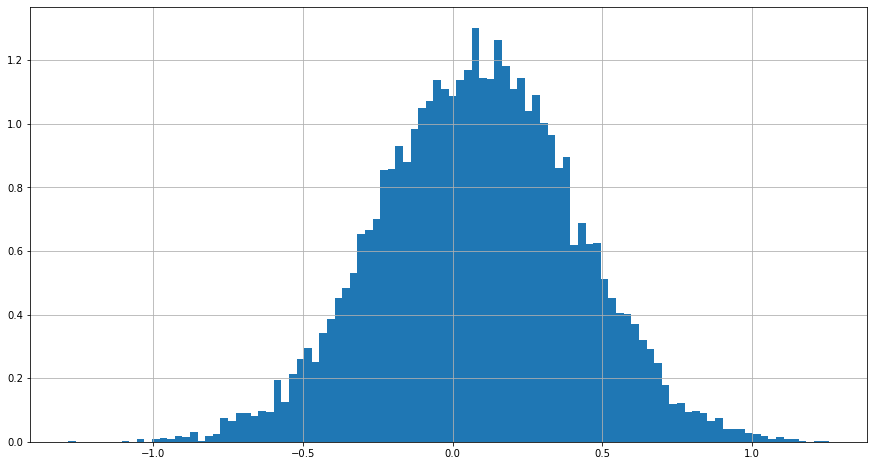

In [44]:
collection['meanlist'].hist(bins=100, normed=1,figsize=(15,8))

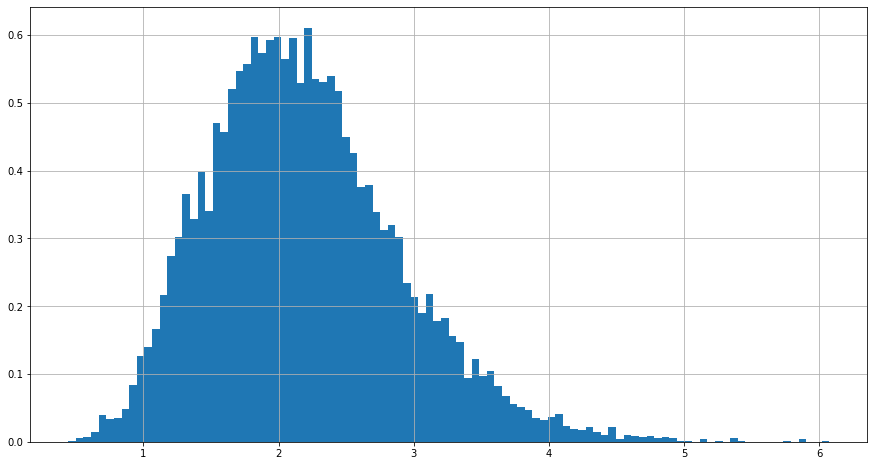

In [45]:
collection['varlist'].hist(bins=100, normed=1,figsize=(15,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f05c7d0cf50>]],
      dtype=object)

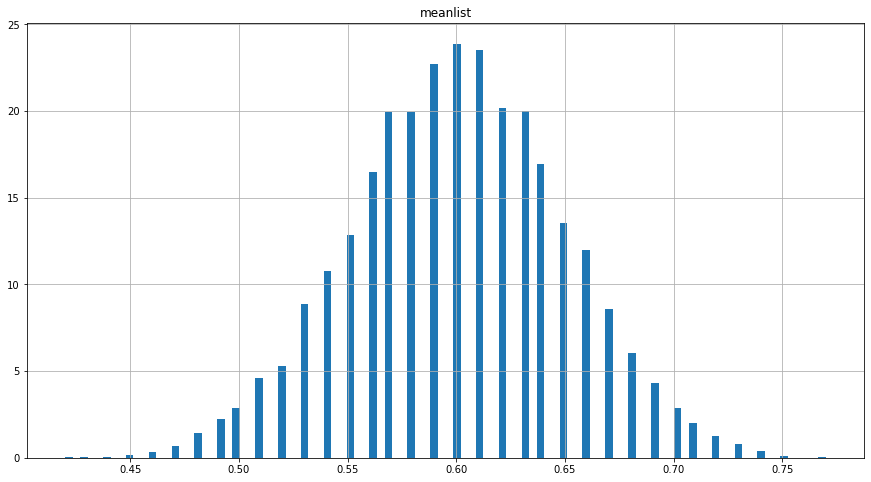

In [46]:
# See what central limit theorem tells you...the sample size is larger enough, 
# the distribution of sample mean is approximately normal
# apop is not normal, but try to change the sample size from 100 to a larger number. The distribution of sample mean of apop 
# becomes normal.
sample_size = 100
samplemeanlist = []
apop =  pd.DataFrame([1, 0, 1, 0, 1])
for t in range(10000):
    sample = apop[0].sample(sample_size, replace=True)  # small sample size
    samplemeanlist.append(sample.mean())

acollec = pd.DataFrame()
acollec['meanlist'] = samplemeanlist
acollec.hist(bins=100, normed=1,figsize=(15,8))